In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Прочитайте csv файл (використовуйте функцію read_csv)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv')

In [ ]:
#Виведіть перші п'ять рядків (використовується функція head)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
#Виведіть розміри датасету (використовуйте атрибут shape)
df.shape

(550, 7)

In [ ]:
#Унікальні книги
df_unique = df.drop_duplicates(subset=['Name', 'Author']).reset_index(drop=True)
df_unique.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df_unique

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
346,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
347,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
348,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


In [ ]:
#Відповідь: Про скільки книг зберігає дані датасет? - 351 уникальных, 550 -всего записей

In [ ]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [ ]:
missing_percentages = df.isnull().sum() / len(df) * 100
missing_percentages
#Відповідь: Чи є в якихось змінних пропуски? ні

name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64

In [ ]:
df['genre'].unique()
#Відповідь: Які є унікальні жанри? - ['Non Fiction', 'Fiction']

array(['Non Fiction', 'Fiction'], dtype=object)

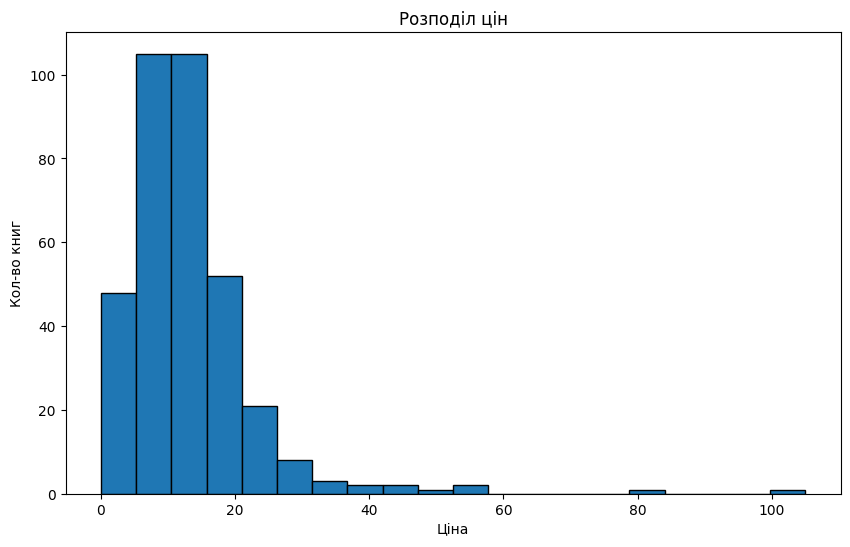

In [ ]:
df_unique['price'].plot(kind='hist', bins=20, edgecolor='black', figsize=(10, 6))
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Кол-во книг')
plt.show()

In [ ]:
df_unique['price'].describe()
#Відповідь: Максимальна ціна? - 105.0
#Відповідь: Мінімальна ціна?  -  0.0
#Відповідь: Середня ціна?     -  13.076923
#Відповідь: Медіанна ціна?    -  12.0


count    351.000000
mean      13.076923
std       10.050860
min        0.000000
25%        8.000000
50%       12.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

In [ ]:
df['user_rating'].max()
#Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9

4.9

In [ ]:
df_unique[df_unique['user_rating']== df['user_rating'].max()].shape
#Відповідь: Скільки книг мають такий рейтинг? Відповідь: 28

(28, 7)

In [ ]:
df['user_rating'].describe()

count    550.000000
mean       4.618364
std        0.226980
min        3.300000
25%        4.500000
50%        4.700000
75%        4.800000
max        4.900000
Name: user_rating, dtype: float64

In [ ]:
df[df['reviews']== df['reviews'].max()].value_counts()
#Відповідь: Яка книга має найбільше відгуків?: Where the Crawdads Sing  Delia Owens  4.8   87841    15     2019  Fiction

name                     author       user_rating  reviews  price  year  genre  
Where the Crawdads Sing  Delia Owens  4.8          87841    15     2019  Fiction    1
dtype: int64

In [ ]:
df_2015 = df[df['year']== 2015]
df_2015.loc[df_2015['price'].idxmax()]
#З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча
# Відповідь:
'''
name           Go Set a Watchman: A Novel
author                         Harper Lee
user_rating                           3.6
reviews                             14982
price                                  19
year                                 2015
genre                             Fiction
'''

'\nname           Go Set a Watchman: A Novel\nauthor                         Harper Lee\nuser_rating                           3.6\nreviews                             14982\nprice                                  19\nyear                                 2015\ngenre                             Fiction\n'

In [ ]:
df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape
#Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 20

(20, 7)

In [ ]:
df[((df['year']== 2010 )| (df['year']==2011)) & (df['user_rating'] == 4.9)].value_counts()
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1

name                                                                       author       user_rating  reviews  price  year  genre      
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)  Sarah Young  4.9          19576    8      2011  Non Fiction    1
dtype: int64

In [ ]:
df[(df['year']==2015)&(df['price']<8)].sort_values(by='price').tail(1)
#Яка книга остання у відсортованому списку за зростанням price у 2015 р до 8$? -
#253	Old School (Diary of a Wimpy Kid #10)	Jeff Kinney	4.8	6169	7	2015	Fiction

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


In [ ]:
df[df['genre'] == 'Fiction']['price'].describe()
#Максимальна ціна для жанру Fiction: Відповідь - 82
#Мінімальна ціна для жанру Fiction: Відповідь - 0

count    240.00000
mean      10.85000
std        8.57275
min        0.00000
25%        6.00000
50%        9.00000
75%       13.00000
max       82.00000
Name: price, dtype: float64

In [ ]:
df[df['genre'] == 'Non Fiction']['price'].describe()
#Максимальна ціна для жанру Non Fiction: Відповідь - 105
#Мінімальна ціна для жанру Non Fiction: Відповідь - 0

count    310.000000
mean      14.841935
std       12.043241
min        0.000000
25%        8.000000
50%       12.000000
75%       17.000000
max      105.000000
Name: price, dtype: float64

In [ ]:
number_books_by_author = df.groupby('author').agg({'name': 'count'}).reset_index()
number_books_by_author.columns = ['author', 'number_books']
print(number_books_by_author.shape)
number_books_by_author[number_books_by_author['number_books'] == number_books_by_author['number_books'].max()]

#Якої розмірності вийшла таблиця? Відповідь: (248, 2)
#Який автор має найбільше книг? Відповідь: Jeff Kinney
#Скільки книг цього автора? Відповідь: 12

(248, 2)


,author,number_books
120,Jeff Kinney,12


In [ ]:
avg_rate_by_author = df.groupby('author').agg({'user_rating': 'mean'}).reset_index()
avg_rate_by_author.columns = ['author', 'avg_rate']
avg_rate_by_author[avg_rate_by_author['avg_rate'] == avg_rate_by_author['avg_rate'].min()]
#У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
#Який у цього автора середній рейтинг? Відповідь: 3.9

,author,avg_rate
71,Donna Tartt,3.9


In [ ]:
new_df = pd.concat([number_books_by_author, avg_rate_by_author], axis=1)
new_df = new_df.loc[:,~new_df.columns.duplicated()]
print(new_df.shape, new_df.columns)
new_df.head()

(248, 3) Index(['author', 'number_books', 'avg_rate'], dtype='object')


,author,number_books,avg_rate
0,Abraham Verghese,2,4.6
1,Adam Gasiewski,1,4.4
2,Adam Mansbach,1,4.8
3,Adir Levy,1,4.8
4,Admiral William H. McRaven,1,4.7


In [ ]:
new_df = new_df.sort_values(by=['number_books', 'avg_rate']).reset_index()

print(new_df.columns)
new_df.head(1)
#Який автор перший у списку? - Muriel Barbery	1	4.0

Index(['index', 'author', 'number_books', 'avg_rate'], dtype='object')


,index,author,number_books,avg_rate
0,171,Muriel Barbery,1,4.0


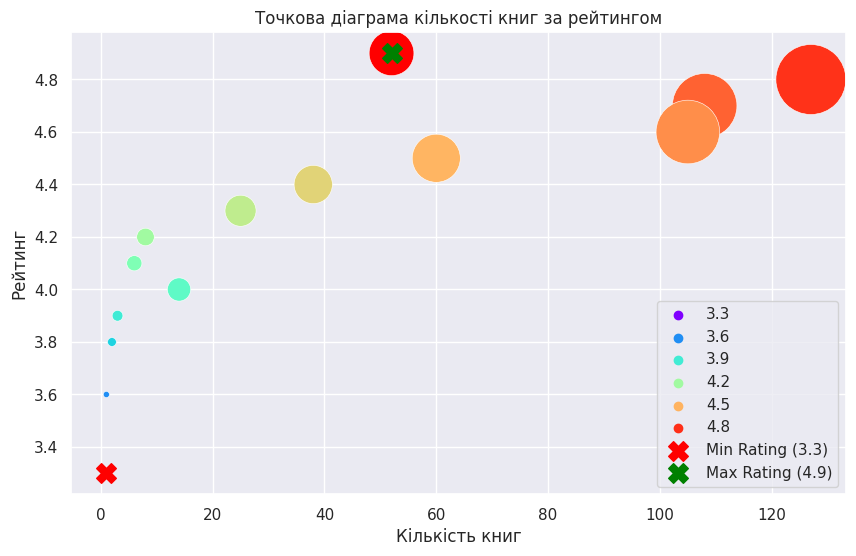

In [ ]:
#Диаграмма количество книг по рейтингу
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
rating_counts = df['user_rating'].value_counts()
sizes = rating_counts.values * 20
sns.scatterplot(x=rating_counts.values, y=rating_counts.index, s=sizes, hue=rating_counts.index, palette='rainbow')
min_rating = df['user_rating'].min()
max_rating = df['user_rating'].max()
plt.scatter([rating_counts[min_rating]], [min_rating], color='red', marker='X', s=200, label=f'Min Rating ({min_rating})')
plt.scatter([rating_counts[max_rating]], [max_rating], color='green', marker='X', s=200, label=f'Max Rating ({max_rating})')
plt.legend()
plt.xlabel('Кількість книг')
plt.ylabel('Рейтинг')
plt.title('Точкова діаграма кількості книг за рейтингом')
plt.show()

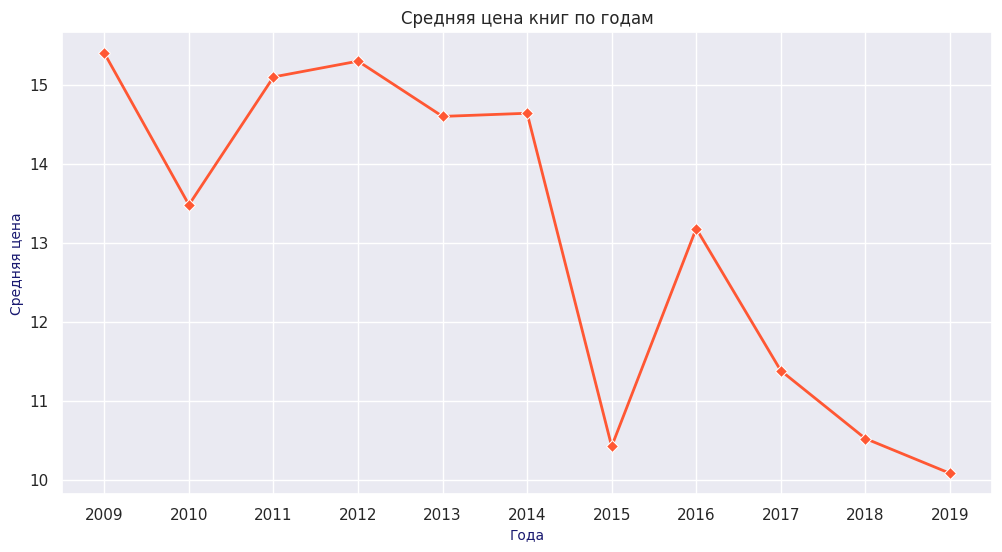

In [ ]:
#Средняя цена книг по годам
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price', data=df, err_style=None, color="#FF5733", linewidth=2, marker="D")
plt.xticks(df['year'].unique())
plt.xlabel("Года", fontsize="small", color="midnightblue")
plt.ylabel("Средняя цена", fontsize="small", color="midnightblue")
plt.title('Средняя цена книг по годам')
plt.show()

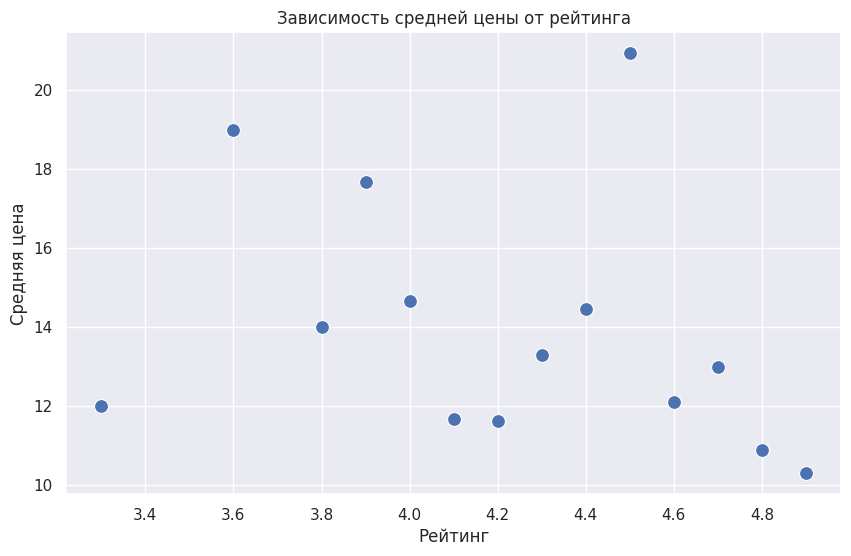

In [63]:
# Построение диаграммы зависимости средней цены от рейтинга
average_price_by_rating = df.groupby('user_rating')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_rating', y='price', data=average_price_by_rating, s=100)
plt.title('Зависимость средней цены от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Средняя цена')
plt.show()